In [1]:

# agrega ruta de busqueda donde tenemos archivos .py
import sys
FUENTES_DIR = "../../Recursos"
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassRNMulticlase import RNMulticlase

In [3]:
datos = pd.read_csv('../../Datos/iris.csv')
datos

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = np.array(datos.iloc[:, :4])
T = np.array(datos['class'])
nomClases = datos['class'].value_counts()
# creating instance of one-hot-encoder
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
T = enc.fit_transform(T.reshape(-1,1)).toarray()

print("Primeros ejemplos con sus valores de rta.esperados\n")
print("X\n", X[0:5,:])
print("T\n", T[0:5,:])


Primeros ejemplos con sus valores de rta.esperados

X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
T
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [6]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.50) #, random_state=42)
normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)


In [7]:
# Opciones para la función de activación: 'sigmoid', 'tanh' o 'softmax'
# Opciones para la función de costo : 'ECM', 'EC_binaria', 'EC'
# Combinaciones válidas: 'sigmoid'-'ECM', 'sigmoid'-'EC_binaria', 'tanh'-'ECM', 'softmax'-'EC'

funcion = 'softmax'  
funcionCOSTO = 'EC'

if (funcion == 'tanh'):
    T_train = 2*T_train-1
    T_test  = 2*T_test-1

rn = RNMulticlase(alpha=0.1, n_iter=800, cotaE=1e-06, FUN=funcion, COSTO=funcionCOSTO, random_state=None)
resul = rn.fit(X_train, T_train)

In [8]:
print("Pesos obtenidos\n")
print(rn.w_)
print(rn.b_)

Pesos obtenidos

[[-3.5181511   2.57686962 -6.64334567 -5.96314928]
 [ 2.8694633  -0.58723314 -2.94611064 -3.62092279]
 [ 0.45207022 -2.38769344  9.17399595  8.80796655]]
[[-0.02021603]
 [ 7.42200827]
 [-7.47476875]]


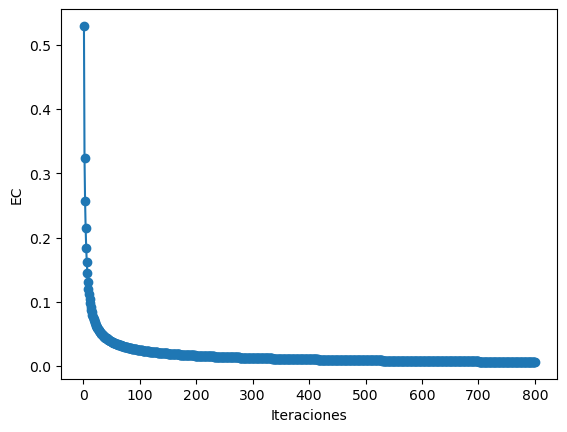

In [9]:
plt.plot(range(1, len(rn.errors_) + 1), rn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel(funcionCOSTO)
plt.show()

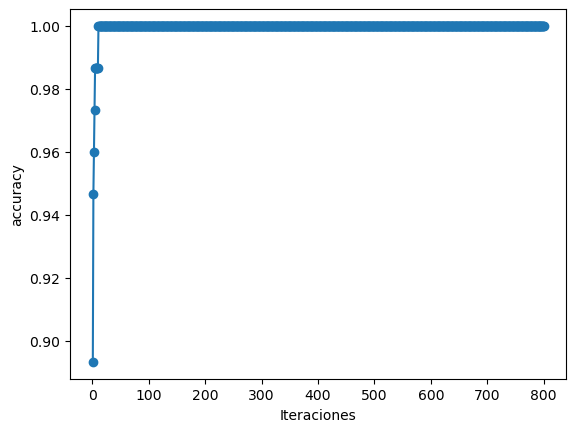

In [10]:
plt.plot(range(1, len(rn.accuracy_) + 1), rn.accuracy_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('accuracy')
plt.show()

In [11]:
#-- accuracy en entrenamiento y testeo ---
acc_Train = rn.accuracy(X_train, T_train)
acc_Test = rn.accuracy(X_test, T_test)
print("acc.Train = %.2f    acc.Test = %.2f" % (acc_Train, acc_Test))

acc.Train = 1.00    acc.Test = 0.96


## Otras funciones de RNMulticlase

In [12]:
# netas de la capa de salida
netas = rn.net_input(X_test[:5, :])
np.round(netas,2)

array([[ 21.43,  12.78, -33.04],
       [-18.29,   5.17,  11.29],
       [ 20.16,  12.83, -31.36],
       [ 22.32,  11.58, -32.68],
       [ 25.13,  13.19, -37.99]])

In [13]:
# aplicamos la función de activación
print("Funcion de activacion : ", funcion)
salidas = rn.evaluar(netas)
np.round(salidas,2)

Funcion de activacion :  softmax


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [14]:
# salida continua de cada neurona
y_hat = rn.predict_nOut(X_test[:5, :])
print(y_hat)

print("valores obtenidos")
print(np.round(y_hat,2))

[[9.99824993e-01 1.75007497e-04 2.19264728e-24]
 [1.41068618e-13 2.19357894e-03 9.97806421e-01]
 [9.99342347e-01 6.57653118e-04 4.22753249e-23]
 [9.99978450e-01 2.15497931e-05 1.29728810e-24]
 [9.99993454e-01 6.54644257e-06 3.85556328e-28]]
valores obtenidos
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [15]:
# Para las funciones sigmoides, los valores obtenidos deben ser 
# convertidos en binario ANTES de comparar con la rta esperada
# La función softmax responde la posición del máximo
print("valores obtenidos")
print(np.round(y_hat,2))

if (funcion=='tanh'):
    y_hat = (y_hat>0)*1
    
if (funcion=='sigmoid'):
    y_hat = (y_hat>0.5)*1

print("\nvalores obtenidos luego de convertirlos en binario")
print(y_hat)   
   
print("\nvalores esperados")
print(T_test[:5, :])     

valores obtenidos
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

valores obtenidos luego de convertirlos en binario
[[9.99824993e-01 1.75007497e-04 2.19264728e-24]
 [1.41068618e-13 2.19357894e-03 9.97806421e-01]
 [9.99342347e-01 6.57653118e-04 4.22753249e-23]
 [9.99978450e-01 2.15497931e-05 1.29728810e-24]
 [9.99993454e-01 6.54644257e-06 3.85556328e-28]]

valores esperados
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [16]:
y_binario = rn.predict(X_test[:5, :])
print(y_binario)
print(np.argmax(T_test[:5,:], axis=1))

[0 2 0 0 0]
[0 2 0 0 0]


In [17]:
rn.accuracy(X_test[:5, :], T_test[:5, :])

1.0